# Project Overview
 World problem in 2020 is COVID -19, which have 7.3% fatality rate on patients with Diabetes comparing to other patients is 2.3 %. Many complications occur if diabetes remains untreated and unidentified in COVID situation as diabetes is one of the deadliest and chronic diseases which causes an increase in blood sugar end up in multiple organism failure with COVID. With the current situation it is not recommended to visit diagnostic center and hospital multiple times just for diagnosing. Machine learning approaches solves this critical problem at the early stage by analyzing the predicted result with online doctor consultation. As the vaccination for COVID-19 is not still available early detection of diabetes help patients and world health sector to focus on health and infrastructure planning in advance to handle growing number of diabetes patients which is forecasted to be 642 million by 2040.

The motive of this study is to design a model which can prognosticate the likelihood of diabetes in patients with maximum accuracy just by invoking Endpoint of Sagemaker with parameters they got from the Glucose Tolerance Test(GTT) result done recently before COVID or from laboratory results done in remote. The model result will be of binary classification The results of this model can then be used to help detect diabetes in an earlier stage to allow individuals to live a healthier lifestyle and be alert in protecting themselves from coronavirus until vaccination is found and safe to inject to all

# Dataset

The Prima Indian Diabetes Dataset with 768 patient’s data has been used in this study, provided by the UCI Machine Learning Repository (https://www.kaggle.com/uciml/pima-indians-diabetes-database). The dataset has been originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. 

In [1]:
%matplotlib inline

# Load the data into a dataframe
import pandas as pd
import os

raw_data_dir = 'data/raw'
diabetes_df = pd.read_csv(os.path.join(raw_data_dir, 'diabetes.csv'))
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Exploration
The Prima Indian Diabetes Dataset have 768 observations with following 8 medical predictor features 
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
*  BMI: Body Mass Index (weight in kg/(height in m)²)
* DiabetesPedigreeFunction: Diabetes pedigree function on genetic influence and hereditary risk
* Age: Age (years)


In [2]:
# Look at the data to get an idea of what it contains.

# data overview
print ('Total Records     : ', diabetes_df.shape[0])
print ('Total Attributes  : ', diabetes_df.shape[1])
print ('\nFeatures : \n', diabetes_df.columns.tolist())
print ('\nMissing values :  ', diabetes_df.isnull().sum().values.sum())
print ('\nUnique values :  \n', diabetes_df.nunique())

Total Records     :  768
Total Attributes  :  9

Features : 
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Missing values :   0

Unique values :  
 Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


In [3]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
diabetes_df.info()
diabetes_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### The PIMA diabetes Dataset have one target variable (output 0 for ”no diabetes” or 1 for ”yes”). Let’s check the target variable distribution:

0    500
1    268
Name: Outcome, dtype: int64


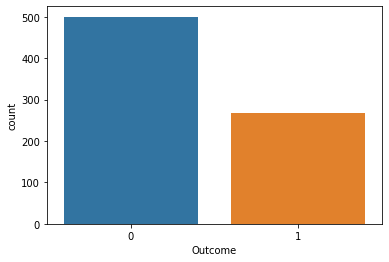

In [6]:
import seaborn as sns
sns.countplot(x = 'Outcome',data = diabetes_df)
print(diabetes_df.Outcome.value_counts())

### Observations:
* There are a total of 768 records and 9 features in the dataset.
* Each feature can be either of integer or float data type.
* In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative
* There are 500 patients with diabetes negative and 268 with diabetes positive


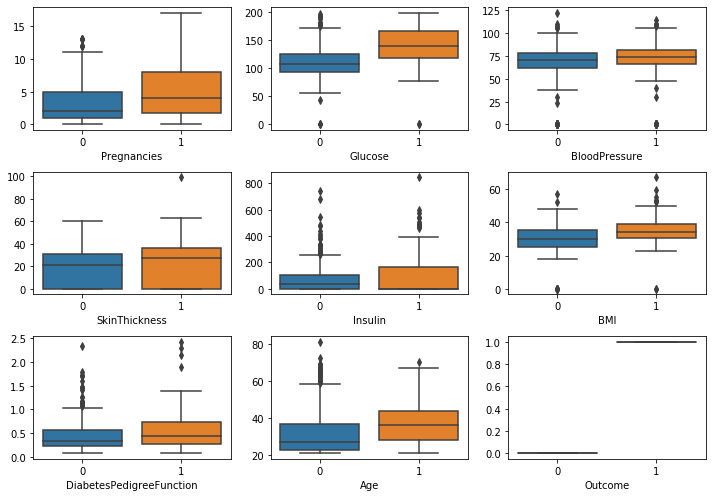

In [10]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 7))
for col, val in enumerate( diabetes_df): 
    ax = axes[int(col / 3), col % 3] 
    sns.boxplot(x='Outcome', y=val, data= diabetes_df, ax=ax) 
    ax.set_xlabel(val) 
    ax.set_ylabel('') 
fig.tight_layout();
fig.savefig("boxplot.png", dpi = 300)

#### Let’s visualise the distribution of 8 medical predictor features along with target variable 'outcome'

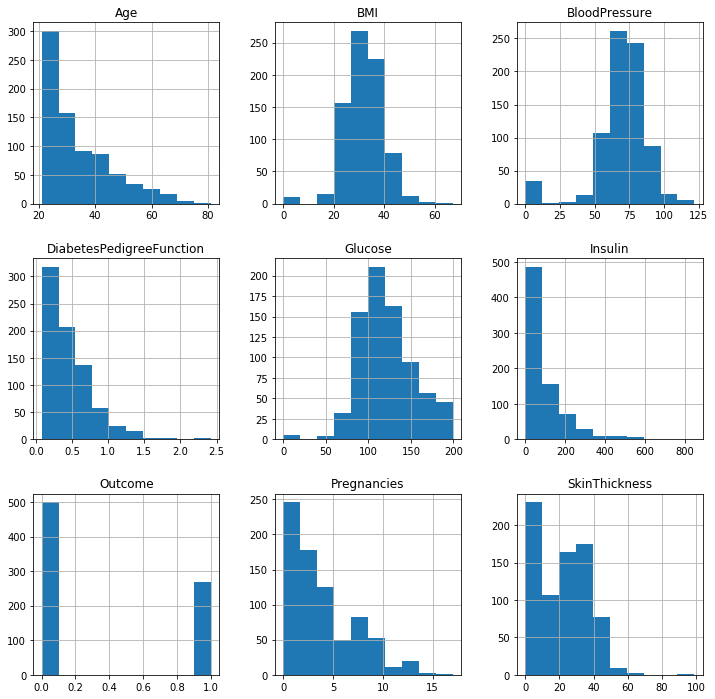

In [11]:
_ = diabetes_df.hist(figsize =(12,12))


#### Let’s visualise the distribution of these 8 features with respect to binary value of outcome value '0 - No Diabetes ,1 - Diabetes'.

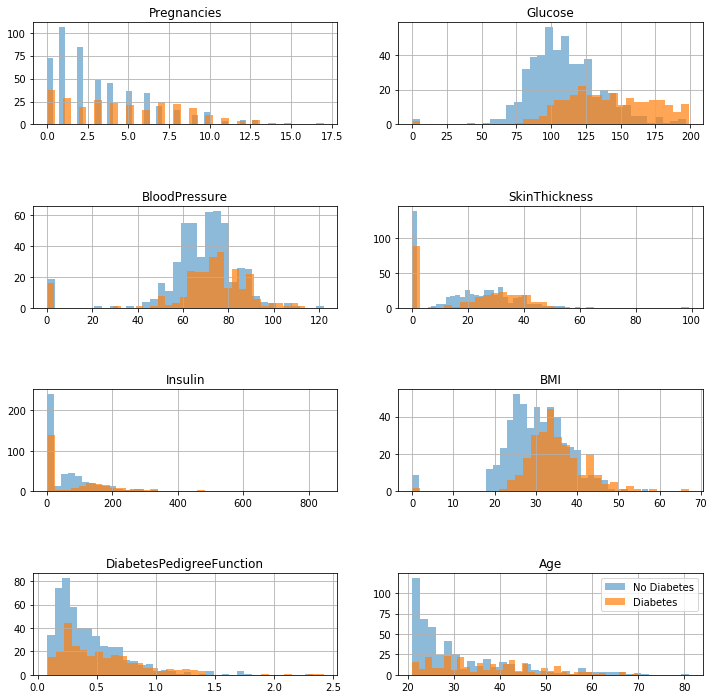

In [12]:
# To analyses feature-outcome distribution in visualization

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

ROWS, COLS = 4, 2
fig, ax = plt.subplots(ROWS, COLS, figsize=(12,12) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    diabetes_df[diabetes_df.Outcome==0][feature].hist(bins=35,  alpha=0.5, ax=ax[row, col]).set_title(feature)
    diabetes_df[diabetes_df.Outcome==1][feature].hist(bins=35,  alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.8)

Visual inspection of a summary of the data shows that there are a number of features with minimum values of 0. 

 ## Review of missing feature values:

There are missing variable in the dataset

Pregnancies - 0 can be a valid measurement

Glucose: - 0 is unlikely to be a valid measurement

Blood Pressure: - 0 is unlikely to be a valid measurement

Skin Thickness: - 0 is unlikely to be a valid measurement

Insulin: - 0 is unlikely to be a valid measurement

BMI: - 0 is unlikely to be a valid measurement

DiabetesPedigreeFunction: - 0 can be a valid measurement score representing hereditary risk of diabetes based on family history

In [14]:
# look at missing values -- indicated with a zero

print("Counts of zero as values:")
print("\t Pregnancies: {}".format(sum(diabetes_df.Pregnancies == 0)))
print("\t Glucose: {}".format(sum(diabetes_df.Glucose == 0)))
print("\t Blood Pressure: {}".format(sum(diabetes_df.BloodPressure == 0)))
print("\t SkinThickness: {}".format(sum(diabetes_df.SkinThickness == 0)))
print("\t Insulin: {}".format(sum(diabetes_df.Insulin == 0)))
print("\t BMI: {}".format(sum(diabetes_df.BMI == 0)))


Counts of zero as values:
	 Pregnancies: 111
	 Glucose: 5
	 Blood Pressure: 35
	 SkinThickness: 227
	 Insulin: 374
	 BMI: 11


# Pre-Processing
1. Remove Outliers of SkinThickness and Insulin
2. Replace zero value of Glucose, BloodPressure, SkinThickness, Insulin, BMI with median for each feature

In [15]:
## Remove 'SkinThickness' outliers
index = diabetes_df[(diabetes_df['SkinThickness'] >= 90)].index
diabetes_df.drop(index, inplace=True)
diabetes_df['SkinThickness'].describe()

count    767.000000
mean      20.434159
std       15.708524
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       63.000000
Name: SkinThickness, dtype: float64

In [16]:
def replace_zero_mean(df, field, target):
    mean_by_target = df.loc[df[field] != 0, [field, target]].groupby(target).mean()
    diabetes_df.loc[(df[field] == 0)&(df[target] == 0), field] = mean_by_target.iloc[0][0]
    diabetes_df.loc[(df[field] == 0)&(df[target] == 1), field] = mean_by_target.iloc[1][0]

In [17]:
#replace_zero_nan
import numpy as np
diabetes_df.Glucose.replace(0, np.nan, inplace=True)
diabetes_df.BloodPressure.replace(0, np.nan, inplace=True)
diabetes_df.SkinThickness.replace(0, np.nan, inplace=True)
diabetes_df.Insulin.replace(0, np.nan, inplace=True)
diabetes_df.BMI.replace(0, np.nan, inplace=True)

# Count of NaN match with count of zero values
diabetes_df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     373
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [18]:
#replace_nan_median

diabetes_df.Glucose.replace(np.nan, diabetes_df['Glucose'].median(), inplace=True)
diabetes_df.BloodPressure.replace(np.nan, diabetes_df['BloodPressure'].median(), inplace=True)
diabetes_df.SkinThickness.replace(np.nan, diabetes_df['SkinThickness'].median(), inplace=True)
diabetes_df.Insulin.replace(np.nan, diabetes_df['Insulin'].median(), inplace=True)
diabetes_df.BMI.replace(np.nan, diabetes_df['BMI'].median(), inplace=True)

In [19]:
# to replace with mean call the function replace_zero_mean
#for feature in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
 #   replace_zero_mean(diabetes_df, feature, 'Outcome')

In [20]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,767.0,3.847458,3.371117,0.000,1.0000,3.000,6.0000,17.00
Glucose,767.0,121.558018,30.336089,44.000,99.5000,117.000,140.0000,199.00
BloodPressure,767.0,72.389831,12.104228,24.000,64.0000,72.000,80.0000,122.00
SkinThickness,767.0,29.016949,8.426210,7.000,25.0000,29.000,32.0000,63.00
Insulin,767.0,140.692308,86.437570,14.000,121.0000,125.000,127.5000,846.00
BMI,767.0,32.452282,6.879184,18.200,27.5000,32.300,36.6000,67.10
DiabetesPedigreeFunction,767.0,0.471742,0.331524,0.078,0.2435,0.371,0.6265,2.42
Age,767.0,33.203390,11.721879,21.000,24.0000,29.000,41.0000,81.00
Outcome,767.0,0.348110,0.476682,0.000,0.0000,0.000,1.0000,1.00


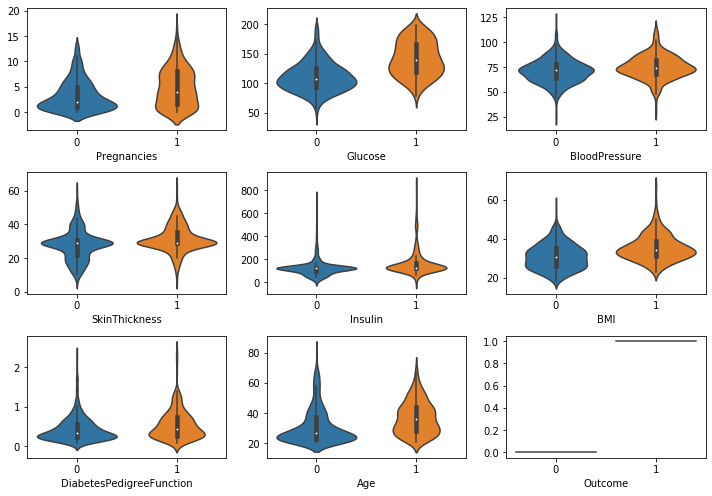

In [21]:

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 7))
for col, val in enumerate( diabetes_df): 
    ax = axes[int(col / 3), col % 3] 
    sns.violinplot(x='Outcome', y=val, data= diabetes_df, ax=ax) 
    ax.set_xlabel(val) 
    ax.set_ylabel('') 
fig.tight_layout();
#fig.savefig("boxplot.png", dpi = 300)

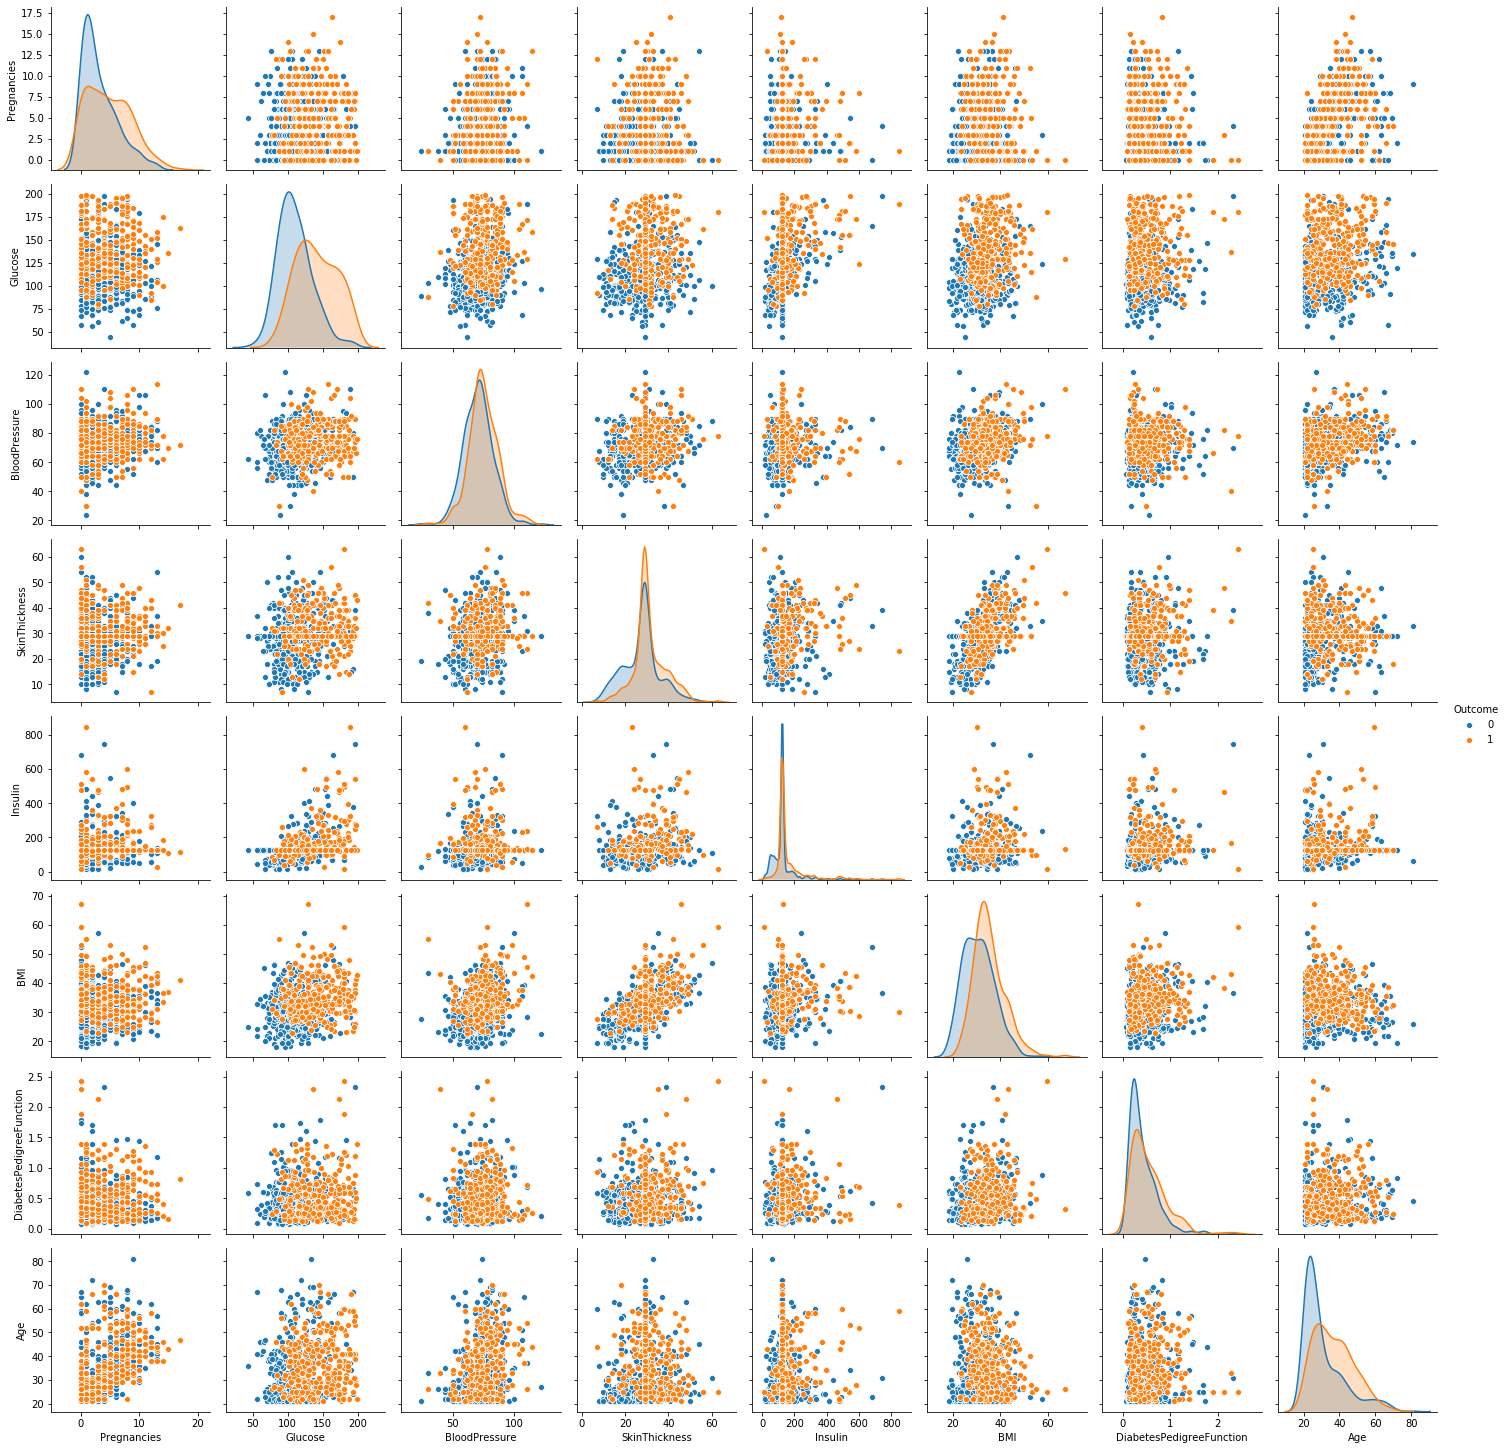

In [22]:

# Pairplot 
sns.pairplot(data = diabetes_df, hue = 'Outcome')
plt.show()


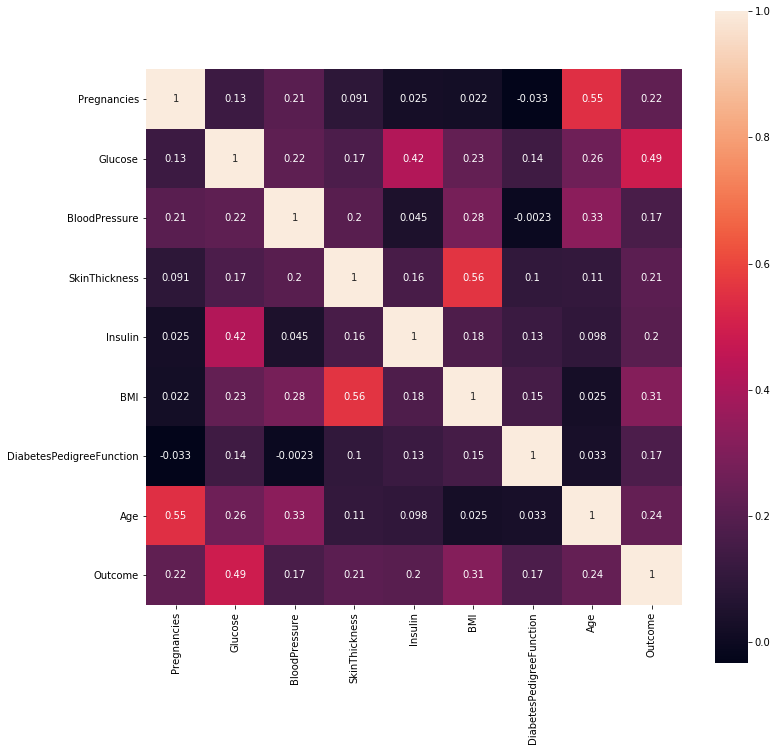

In [23]:
# Correlation matrix
#diabetes_df['Outcome'].value_counts().plot(kind = 'bar').set_title('Diabetes Outcome')

corrmat = diabetes_df.corr()
fig = plt.figure(figsize = (12, 12))

sns.heatmap(corrmat, square = True,annot=True)
plt.show()



From violin plot ,pairplot and heatmap , it is clear in plot, that there is a high correlation between Outcome and [Glucose,Insulin ,BMI,Age] of the patient. 

# Feature Importance

In [25]:
# separate features from labels
labels = diabetes_df.Outcome
dataset = diabetes_df.drop(columns = ['Outcome'])

Text(0.5, 1.0, 'Top Features derived by Random Forest')

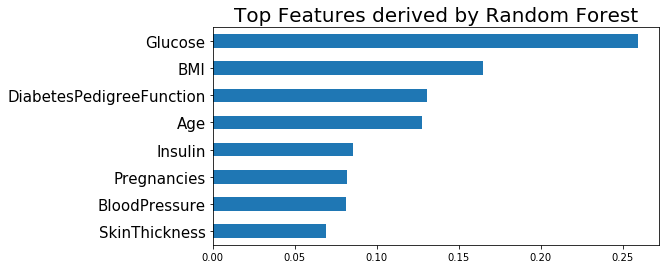

In [26]:
## Feature importance using Random Forest
# Create decision tree classifer object
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state= 27, n_estimators=100)

# Train model, note that NO scaling is required
rfc_model = rfc.fit(X = dataset, y = labels)

# Plot the top features based on its importance
(pd.Series(rfc_model.feature_importances_, index=dataset.columns)
    .nlargest(10)   # can adjust based on how many top features you want
    .plot(kind='barh', figsize=[8,4])
    .invert_yaxis()) # Ensures that the feature with the most importance is on top, in descending order

plt.yticks(size=15)
plt.title('Top Features derived by Random Forest', size=20)# Selecting features - [Glucose, Insulin, BMI, Age]
#dataset = dataset_scaled.iloc[:, [1, 4, 5, 7]].values





## Feature Scaling

* MinMaxScaler(feature_range = (0, 1)) will transform each value in the column proportionally within the range [0,1]. Use this as the first scaler choice to transform a feature, as it will preserve the shape of the dataset (no distortion).

* StandardScaler() will transform each value in the column to range about the mean 0 and standard deviation 1, ie, each value will be normalised by subtracting the mean and dividing by standard deviation. Use StandardScaler if you know the data distribution is normal.

Applying scaler for the full dataset is not recommended as there is chance for data leakage, 
so I had moved Normalization step to after splitting the dataset as given in https://machinelearningmastery.com/data-preparation-without-data-leakage/

# Split the data 

In [27]:
from sklearn.model_selection import train_test_split
random_state = 27

#dataset = dataset_scaled # with scaled dataset also accuracy remain same except for decision tree
dataset = dataset
# split into train, test and validation in 80:10:10
X_train, X_test_val, y_train, y_test_val = train_test_split(dataset, labels, 
                                                          random_state = random_state,
                                                          test_size = .2)

In [28]:
# split remaining 20% of data in into  10% validation and  10% testing
X_test,X_val, y_test, y_val = train_test_split(X_test_val, y_test_val,
                                                random_state = random_state,
                                                test_size = .5)

# print dimension of train, test and validation data
print("Training data dimension: {} Training label dimension: {}".format(X_train.shape, y_train.shape))
print("Validation data dimension: {} Validation label dimension: {}".format(X_val.shape, y_val.shape))
print("Testing data dimension: {} Testing label dimension: {}".format(X_test.shape, y_test.shape))

Training data dimension: (613, 8) Training label dimension: (613,)
Validation data dimension: (77, 8) Validation label dimension: (77,)
Testing data dimension: (77, 8) Testing label dimension: (77,)


In [29]:
np.bincount(y_train)

array([398, 215])

There is imbalance in the y_train values. To overcome this problem, we can use the SMOTE technique.
Synthetic Minority Oversampling Technique (SMOTE) is used to remove the imbalance in the training data by creating samples using the current data. It does not create duplicates. It can be applied to the Training data alone and not on the original data as the Test Data should only contain real-life values and not the synthetic sample. As AWS sagemaker doesn't support SMOTE library currently , dropped the idea of implementing class balancing with this technique.

In [31]:
# Feature Scaling on X_Train to avoid leakage of data
from sklearn.preprocessing import StandardScaler,MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
#sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
dataset_scaled = pd.DataFrame(X_train)
dataset_scaled.head()


,0,1,2,3,4,5,6,7
0,0.058824,1.000000,0.530612,0.642857,0.152055,0.599515,0.560788,0.020408
1,0.117647,0.335484,0.448980,0.107143,0.047945,0.070388,0.241010,0.102041
2,0.529412,0.619355,0.714286,0.392857,0.152055,0.351942,0.278253,0.489796
3,0.000000,0.877419,0.551020,1.000000,0.000000,1.000000,1.000000,0.081633
4,0.000000,0.393548,0.448980,0.267857,0.152055,0.043689,0.065068,0.020408


This avoids data leakage as the calculation of the minimum and maximum value for each input variable is calculated using only the training dataset (X_train) instead of the entire dataset (X).

# Build Baseline Model

In [32]:
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
#from sklearn.metrics import fbeta_score, cohen_kappa_score
SEED = 42

#kf = KFold(n_splits=5, shuffle=True, random_state=SEED)   # this may result in imbalance classes in each fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# to give model baseline report in dataframe 
def baseline_report(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    accuracy     = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy'))
    precision    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='precision'))
    recall       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='f1'))
    rocauc       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc'))
    y_pred = model.predict(X_test)
    logloss      = log_loss(y_test, y_pred)   # SVC & LinearSVC unable to use cvs

    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'logloss'      : [logloss]
                             })  
    return df_model

# to evaluate baseline models
bnb = BernoulliNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
svc = SVC()
linearsvc = LinearSVC()

# to concat all models
df_models = pd.concat([baseline_report(bnb, X_train, X_test, y_train, y_test, 'BernoulliNB'),                     
                       baseline_report(logit, X_train, X_test, y_train, y_test, 'LogisticRegression'),
                       baseline_report(knn, X_train, X_test, y_train, y_test, 'KNN'),
                       baseline_report(decisiontree, X_train, X_test, y_train, y_test, 'DecisionTree'),                       
                       baseline_report(svc, X_train, X_test, y_train, y_test, 'SVC'),
                       baseline_report(linearsvc, X_train, X_test, y_train, y_test, 'LinearSVC')
                       ], axis=0).reset_index()
df_models = df_models.drop('index', axis=1)
df_models

,model,accuracy,precision,recall,f1score,rocauc,logloss
0,BernoulliNB,0.644369,0.000000,0.000000,0.000000,0.524945,13.456666
1,LogisticRegression,0.756911,0.719374,0.502326,0.590374,0.829599,8.522607
2,KNN,0.742276,0.631785,0.627907,0.627357,0.798399,10.765447
3,DecisionTree,0.707997,0.553344,0.618605,0.583688,0.672752,10.316881
4,SVC,0.748767,0.693448,0.506977,0.584841,0.832621,7.625486
5,LinearSVC,0.758550,0.703251,0.534884,0.606264,0.830194,8.074052


As I am validating Sagemaker XGBoost model with 10 % X_test data,I had tested baseline models also with 10 % X_test data for same baseline comparison

In [33]:
# structure data for processing by training model and store as csv
def make_csv(x, y, filename, data_dir):
    '''Merges features and labels and converts them into one csv file with labels in the first column.
       :param x: Data features
       :param y: Data labels
       :param file_name: Name of csv file, ex. 'train.csv'
       :param data_dir: The directory where files will be saved
       '''

    # make data dir, if it does not exist
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    
    df_X = pd.DataFrame(x)
    df_y = pd.DataFrame(y)
    
    df_all = pd.concat([df_y,df_X], axis=1)
    
    df_all.to_csv(data_dir + '/' + filename, index = False, header=False)

    # nothing is returned, but a print statement indicates that the function has run
    print('Processed Data Saved: '+str(data_dir)+'/'+str(filename))

In [34]:
processed_data_dir = 'data/processed'
make_csv(X_train, y_train, 'train.csv', processed_data_dir)
make_csv(X_val, y_val, 'validation.csv', processed_data_dir)
make_csv(X_test, y_test, 'test.csv', processed_data_dir)

Processed Data Saved: data/processed/train.csv
Processed Data Saved: data/processed/validation.csv
Processed Data Saved: data/processed/test.csv


Manually Pre-proccess splitted data saved to evaluate the performance with AWS Sagemaker 
XGBoost model against Auto pre-processing feature